In [1]:
import pandas as pd
import numpy as np

In [2]:
gender_mapping = {1: 'Male', 2: 'Female'}
home_language_mapping = {0: 'Kiswahili', 1: 'English', 2: 'Native language'}
hh_occupation_mapping = {0: 'Other', 1: 'Unemployed', 2: 'Agriculture', 3: 'Self-employed', 4: 'Public sector', 5: 'Private sector', 6: 'Housewife'}
hh_children_mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children', 5: 'More than five'}
mothers_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
hh_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
meansToSchool_mapping = {0: 'Walk', 1: 'Bicycle/motorbike', 2: 'Public transport', 3: 'Private car'}
location_name_mapping = {0: 'Rural', 1: 'Urban'}
grade_mapping = {9: 'Form One', 10: 'Form Two', 11: 'Form Three', 12: 'Form Four'}
dropout_mapping = {0: 'No', 1: 'Yes'}
school_distance_mapping = {1: '0-0.5 km', 2: '0.5-1 km', 3: '1-2 km', 4: '2-3 km', 5: '4-5 km', 6: '6-7 km', 7: '7-10 km', 8: 'More than 11 km'}

# Reverse mappings
gender_mapping_reverse = {v: k for k, v in gender_mapping.items()}
home_language_mapping_reverse = {v: k for k, v in home_language_mapping.items()}
hh_occupation_mapping_reverse = {v: k for k, v in hh_occupation_mapping.items()}
hh_children_mapping_reverse = {v: k for k, v in hh_children_mapping.items()}
mothers_edu_mapping_reverse = {v: k for k, v in mothers_edu_mapping.items()}
hh_edu_mapping_reverse = {v: k for k, v in hh_edu_mapping.items()}
meansToSchool_mapping_reverse = {v: k for k, v in meansToSchool_mapping.items()}
location_name_mapping_reverse = {v: k for k, v in location_name_mapping.items()}
grade_mapping_reverse = {v: k for k, v in grade_mapping.items()}
dropout_mapping_reverse = {v: k for k, v in dropout_mapping.items()}
school_distance_mapping_reverse = {v: k for k, v in school_distance_mapping.items()}


def encode_row(row, dropout=False):
    row = row.copy()
    row['gender'] = gender_mapping[row['gender']]
    row['home_language'] = home_language_mapping[row['home_language']]
    row['hh_occupation'] = hh_occupation_mapping[row['hh_occupation']]
    row['hh_children'] = hh_children_mapping[row['hh_children']]
    row['mothers_edu'] = mothers_edu_mapping[row['mothers_edu']]
    row['hh_edu'] = hh_edu_mapping[row['hh_edu']]
    row['meansToSchool'] = meansToSchool_mapping[row['meansToSchool']]
    row['location_name'] = location_name_mapping[row['location_name']]
    row['grade'] = grade_mapping[row['grade']]
    row['school_distanceKm'] = school_distance_mapping[row['school_distanceKm']]
    row['hh_size'] = hh_children_mapping[row['hh_size']]
    if dropout:
        row['dropout'] = dropout_mapping[row['dropout']]
    return row

def decode_row(row, dropout=False):
    row = row.copy()
    row['gender'] = gender_mapping_reverse[row['gender']]
    row['home_language'] = home_language_mapping_reverse[row['home_language']]
    row['hh_occupation'] = hh_occupation_mapping_reverse[row['hh_occupation']]
    row['hh_children'] = hh_children_mapping_reverse[row['hh_children']]
    row['mothers_edu'] = mothers_edu_mapping_reverse[row['mothers_edu']]
    row['hh_edu'] = hh_edu_mapping_reverse[row['hh_edu']]
    row['meansToSchool'] = meansToSchool_mapping_reverse[row['meansToSchool']]
    row['location_name'] = location_name_mapping_reverse[row['location_name']]
    row['grade'] = grade_mapping_reverse[row['grade']]
    row['school_distanceKm'] = school_distance_mapping_reverse[row['school_distanceKm']]
    row['hh_size'] = hh_children_mapping_reverse[row['hh_size']]
    if dropout:
        row['dropout'] = dropout_mapping[row['dropout']]

    return row

In [3]:
# load data
df = pd.read_csv('encoded_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206883 entries, 0 to 206882
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   location_name      206883 non-null  int64
 1   home_language      206883 non-null  int64
 2   hh_occupation      206883 non-null  int64
 3   hh_edu             206883 non-null  int64
 4   hh_size            206883 non-null  int64
 5   school_distanceKm  206883 non-null  int64
 6   age                206883 non-null  int64
 7   gender             206883 non-null  int64
 8   mothers_edu        206883 non-null  int64
 9   grade              206883 non-null  int64
 10  meansToSchool      206883 non-null  int64
 11  hh_children        206883 non-null  int64
 12  dropout            206883 non-null  int64
dtypes: int64(13)
memory usage: 20.5 MB


In [4]:
# encode data
df = df.apply(encode_row, axis=1)

In [5]:
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,Native language,Other,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,More than five,1
1,Rural,Native language,Other,Primary,More than five,0-0.5 km,11,Female,Primary,Form One,Walk,More than five,1
2,Rural,Kiswahili,Other,Primary,More than five,0.5-1 km,11,Female,Primary,Form Two,Walk,More than five,1
3,Urban,Kiswahili,Private sector,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,Five Children,0
4,Urban,Kiswahili,Other,None,More than five,0.5-1 km,11,Male,Secondary,Form One,Walk,More than five,1


In [6]:
features = df.drop('dropout', axis=1)
features.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children
0,Rural,Native language,Other,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,More than five
1,Rural,Native language,Other,Primary,More than five,0-0.5 km,11,Female,Primary,Form One,Walk,More than five
2,Rural,Kiswahili,Other,Primary,More than five,0.5-1 km,11,Female,Primary,Form Two,Walk,More than five
3,Urban,Kiswahili,Private sector,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,Five Children
4,Urban,Kiswahili,Other,None,More than five,0.5-1 km,11,Male,Secondary,Form One,Walk,More than five


In [7]:
categorical_columns = features.select_dtypes(include=['object']).columns
numerical_columns = features.select_dtypes(include=['int64']).columns

In [8]:
target_column = df['dropout']
target_column.head()

0    1
1    1
2    1
3    0
4    1
Name: dropout, dtype: int64

In [9]:
categorical_columns, numerical_columns

(Index(['location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
        'school_distanceKm', 'gender', 'mothers_edu', 'grade', 'meansToSchool',
        'hh_children'],
       dtype='object'),
 Index(['age'], dtype='object'))

In [10]:
# print all unique values for each column
for col in categorical_columns:
    print(col, features[col].unique())

location_name ['Rural' 'Urban']
home_language ['Native language' 'Kiswahili' 'English']
hh_occupation ['Other' 'Private sector' 'Agriculture' 'Self-employed' 'Unemployed'
 'Public sector' 'Housewife']
hh_edu ['Primary' 'None' 'Postsecondary' 'Secondary']
hh_size ['More than five' 'Three Children' 'Five Children' 'Two Children'
 'Four Children']
school_distanceKm ['1-2 km' '0-0.5 km' '0.5-1 km' '2-3 km' '6-7 km' '4-5 km'
 'More than 11 km' '7-10 km']
gender ['Female' 'Male']
mothers_edu ['Primary' 'Secondary' 'Postsecondary' 'None']
grade ['Form Three' 'Form One' 'Form Two' 'Form Four']
meansToSchool ['Walk' 'Bicycle/motorbike' 'Public transport' 'Private car']
hh_children ['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']


In [11]:
from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load

In [12]:
# Create a OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the categorical columns
encoder.fit(df[categorical_columns])

# Save the encoder to a file
dump(encoder, 'general_encoder.joblib')

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['general_encoder.joblib']

In [13]:
encoder = load('general_encoder.joblib')

In [14]:
# Transform the categorical columns
encoded_categorical_columns = encoder.transform(df[categorical_columns])

In [15]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_categorical_columns)

In [16]:
# merge the encoded columns with the numerical columns
features_df = pd.concat([encoded_df, df[numerical_columns]], axis=1)

In [17]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,age
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11


In [18]:
features_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,age
count,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,...,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000,206883.000000
mean,0.966711,0.033289,0.020558,0.649580,0.329863,0.035228,0.007729,0.086754,0.020272,0.009082,...,0.071132,0.009662,0.030877,0.888328,0.150969,0.207417,0.213662,0.251538,0.176414,15.450346
std,0.179392,0.179392,0.141898,0.477103,0.470164,0.184355,0.087575,0.281475,0.140931,0.094868,...,0.257046,0.097822,0.172986,0.314963,0.358020,0.405458,0.409892,0.433898,0.381173,0.810672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


In [19]:
# create train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features_df, target_column, test_size=0.2, random_state=42)

In [20]:
# conver feature names to string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [97]:
clf = LogisticRegression(solver='lbfgs')


# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test.to_numpy())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8844285472605554

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     34537
           1       0.67      0.60      0.63      6840

    accuracy                           0.88     41377
   macro avg       0.80      0.77      0.78     41377
weighted avg       0.88      0.88      0.88     41377



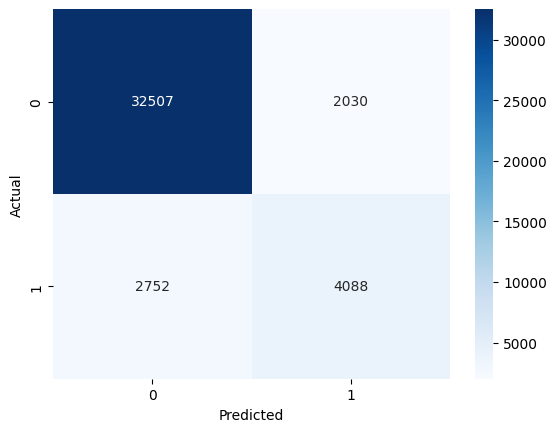

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# print classification report
print(classification_report(y_test, y_pred))


# plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# inference

In [ ]:
[array(['Rural', 'Urban'], dtype=object),
 array(['English', 'Kiswahili', 'Native language'], dtype=object),
 array(['Agriculture', 'Housewife', 'Private sector', 'Public sector',
        'Self-employed', 'Unemployed'], dtype=object),
 array(['None', 'Postsecondary', 'Primary', 'Secondary'], dtype=object),
 array(['Five Children', 'Four Children', 'More than five',
        'Three Children', 'Two Children'], dtype=object),
 array(['0-0.5 km', '0.5-1 km', '1-2 km', '2-3 km', '4-5 km', '6-7 km',
        '7-10 km', 'More than 11 km'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['None', 'Postsecondary', 'Primary', 'Secondary'], dtype=object),
 array(['Form Four', 'Form One', 'Form Three', 'Form Two'], dtype=object),
 array(['Bicycle/motorbike', 'Private car', 'Public transport', 'Walk'],
       dtype=object),
 array(['Five Children', 'Four Children', 'More than five',
        'Three Children', 'Two Children'], dtype=object)]

In [99]:
target_data_for_inference = {
    'location_name': ["Rural"],
    'home_language': ["English"],
    'hh_occupation': ["Private sector"],
    'hh_edu': ["None"],
    'hh_size': ["More than five"],
    'school_distanceKm': ["7-10 km"],
    'age': [11],
    'gender': ["Male"],
    'mothers_edu': ["None"],
    'grade': ["Form One"],
    'meansToSchool': ["Walk"],
    'hh_children': ["Two Children"],
}

# Convert the dictionary to a DataFrame
target_data_for_inference = pd.DataFrame(target_data_for_inference)
transform_data = target_data_for_inference.apply(decode_row, axis=1)
one_hot_transform_data = encoder.transform(target_data_for_inference.drop('age', axis=1))
inference_one_hot_transform_data = np.append(one_hot_transform_data[0], transform_data['age'][0])
inference_data = np.array(inference_one_hot_transform_data)

try:
    predictions = clf.predict([inference_data.astype(str)])
    probabilities = clf.predict_proba([inference_data.astype(str)])
except:
    predictions = clf.predict([inference_data])
    probabilities = clf.predict_proba([inference_data])

dropout_mapping[predictions[0]], probabilities[0]

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


('No', array([0.88511536, 0.11488464]))

In [100]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

In [101]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=20, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multilayer Perceptron': MLPClassifier(),
    # 'Support Vector Machine': SVC(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'BaggingClassifier': BaggingClassifier()
}

Training Random Forest...
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     34537
           1       0.78      0.74      0.76      6840

    accuracy                           0.92     41377
   macro avg       0.87      0.85      0.86     41377
weighted avg       0.92      0.92      0.92     41377



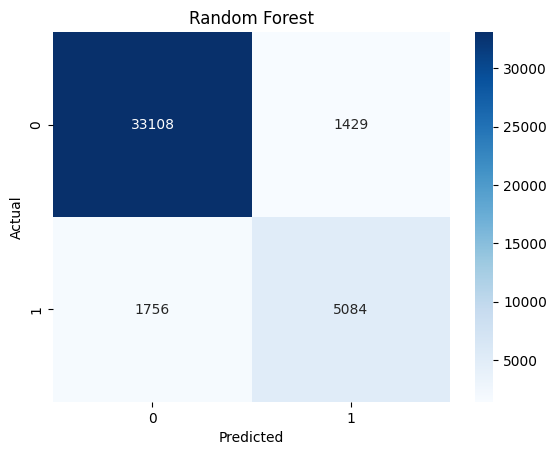

Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     34537
           1       0.67      0.60      0.63      6840

    accuracy                           0.88     41377
   macro avg       0.80      0.77      0.78     41377
weighted avg       0.88      0.88      0.88     41377



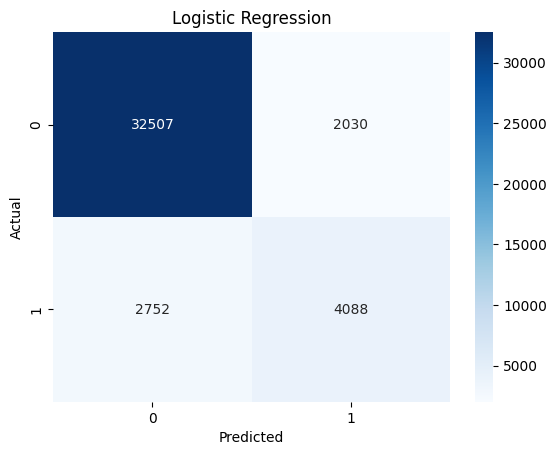

Training KNeighborsClassifier...
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     34537
           1       0.82      0.68      0.74      6840

    accuracy                           0.92     41377
   macro avg       0.88      0.82      0.85     41377
weighted avg       0.92      0.92      0.92     41377



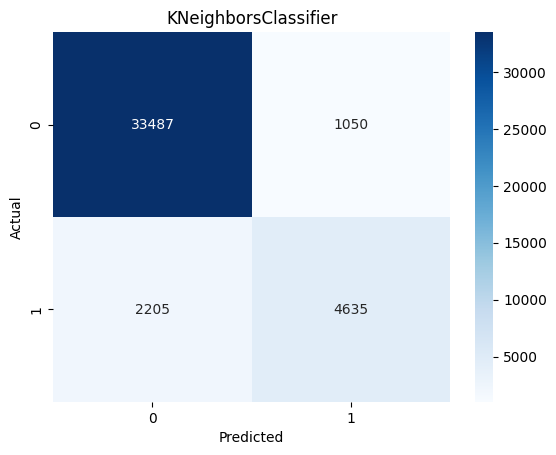

Training Decision Tree...
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     34537
           1       0.78      0.73      0.76      6840

    accuracy                           0.92     41377
   macro avg       0.86      0.85      0.86     41377
weighted avg       0.92      0.92      0.92     41377



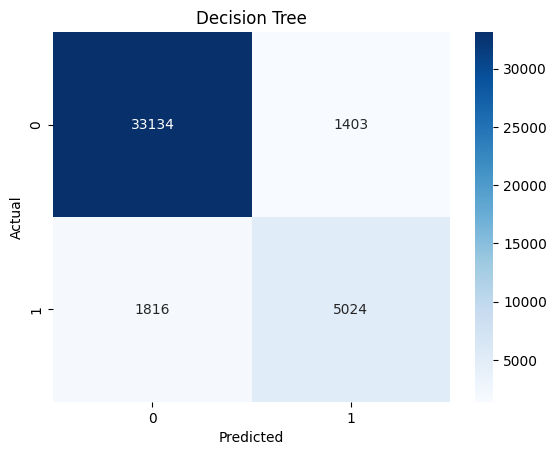

Training Gaussian Naive Bayes...
              precision    recall  f1-score   support

           0       0.97      0.59      0.73     34537
           1       0.30      0.90      0.45      6840

    accuracy                           0.64     41377
   macro avg       0.64      0.75      0.59     41377
weighted avg       0.86      0.64      0.69     41377



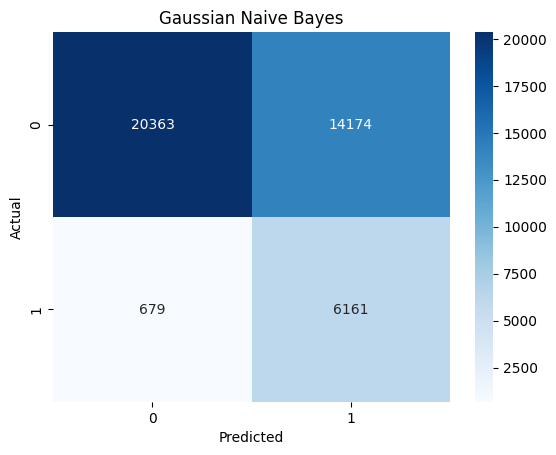

Training Multilayer Perceptron...


In [103]:
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    try:
        y_pred = clf.predict(X_test)
    except:
        y_pred = clf.predict(X_test.to_numpy())

    # report
    print(classification_report(y_test, y_pred))

    # plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name)
    plt.show()
    
    # Save the classifier to a file
    dump(clf, f'models/{clf_name}.joblib')

print("All models trained and saved successfully!")